In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
df_teams = pd.read_csv('Team.csv')
df_teams

,Team_Id,Team_Name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals
5,6,Delhi Daredevils
6,7,Mumbai Indians
7,8,Deccan Chargers
8,9,Kochi Tuskers Kerala
9,10,Pune Warriors


In [3]:
df_score = pd.read_csv('Batsman_Scored.csv')
df_score

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No
0,335987,1,1,0,1
1,335987,1,1,1,2
2,335987,1,2,0,1
3,335987,1,3,0,2
4,335987,1,4,0,1
...,...,...,...,...,...
133092,981024,20,4,0,2
133093,981024,20,5,1,1
133094,981024,20,5,1,2
133095,981024,20,6,6,1


In [4]:
df_match = pd.read_csv('Match.csv')
df_match

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
1,335988,4,3,2008-04-19,1,2,3,2,1,33.0,1,3.0,19.0
2,335989,6,5,2008-04-19,1,3,5,2,2,9.0,1,6.0,90.0
3,335990,7,2,2008-04-20,1,4,7,2,2,5.0,1,2.0,11.0
4,335991,1,8,2008-04-20,1,5,8,2,2,5.0,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22,9,27,2,1,2,6.0,1,2.0,8.0
573,981018,13,2,2016-05-24,9,1,2,1,2,4.0,1,2.0,110.0
574,981020,11,1,2016-05-25,9,3,1,1,1,22.0,1,11.0,163.0
575,981022,13,11,2016-05-27,9,3,11,1,2,4.0,1,11.0,187.0


In [5]:
df= pd.merge(df_score,df_match,on='Match_Id')
df

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,1,1,0,1,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
1,335987,1,1,1,2,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
2,335987,1,2,0,1,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
3,335987,1,3,0,2,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
4,335987,1,4,0,1,2,1,2008-04-18,1,1,2,1,1,140.0,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133092,981024,20,4,0,2,2,11,2016-05-29,9,1,11,2,1,8.0,1,11.0,385.0
133093,981024,20,5,1,1,2,11,2016-05-29,9,1,11,2,1,8.0,1,11.0,385.0
133094,981024,20,5,1,2,2,11,2016-05-29,9,1,11,2,1,8.0,1,11.0,385.0
133095,981024,20,6,6,1,2,11,2016-05-29,9,1,11,2,1,8.0,1,11.0,385.0


In [6]:
drop_cols = ['Venue_Id','Toss_Winner','Toss_Decide','Win_Type','Win_Margin','Outcome_type','Match_Winner','Man_of_the_Match']
df.drop(drop_cols,axis=1,inplace=True)

In [7]:
df.drop('Innings_No', axis=1,inplace=True)
df

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Team_1,Team_2,Match_Date,Season_Id
0,335987,1,1,0,2,1,2008-04-18,1
1,335987,1,1,1,2,1,2008-04-18,1
2,335987,1,2,0,2,1,2008-04-18,1
3,335987,1,3,0,2,1,2008-04-18,1
4,335987,1,4,0,2,1,2008-04-18,1
...,...,...,...,...,...,...,...,...
133092,981024,20,4,0,2,11,2016-05-29,9
133093,981024,20,5,1,2,11,2016-05-29,9
133094,981024,20,5,1,2,11,2016-05-29,9
133095,981024,20,6,6,2,11,2016-05-29,9


In [8]:
df.Team_1.update(df.Team_1.map(df_teams.set_index('Team_Id').Team_Name))
df.Team_2.update(df.Team_2.map(df_teams.set_index('Team_Id').Team_Name))

In [9]:
df_0run = df.copy()
df_0run = df_0run[df_0run.Runs_Scored == 0]
df_1run = df.copy()
df_1run = df_1run[df_1run.Runs_Scored == 1]
df_2run = df.copy()
df_2run = df_2run[df_2run.Runs_Scored == 2]
df_3run = df.copy()
df_3run = df_3run[df_3run.Runs_Scored == 3]
df_4run = df.copy()
df_4run = df_4run[df_4run.Runs_Scored == 4]
df_5run = df.copy()
df_5run = df_5run[df_5run.Runs_Scored == 5]
df = df[df.Runs_Scored == 6]

In [10]:
df_0run

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Team_1,Team_2,Match_Date,Season_Id
0,335987,1,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,1
2,335987,1,2,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,1
3,335987,1,3,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,1
4,335987,1,4,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,1
6,335987,1,5,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,1
...,...,...,...,...,...,...,...,...
133078,981024,19,3,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2016-05-29,9
133079,981024,19,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2016-05-29,9
133080,981024,19,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2016-05-29,9
133090,981024,20,3,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2016-05-29,9


In [11]:
seasonnum = [1,2,3,4,5,6,7,8,9]
dfseasons0 = []
dfseasons1 = []
dfseasons2 = []
dfseasons3 = []
dfseasons4 = []
dfseasons5 = []
dfseasons6 = []
for i in seasonnum:
    #exec("""df_0season{}=df_0run.loc[df_0run['Season_Id']=={}]""".format(i))
    df_0seasoni=df_0run.loc[df_0run['Season_Id']==i]
    dfseasons0.append(df_0seasoni)
for i in seasonnum:
    df_1seasoni=df_1run.loc[df_1run['Season_Id']==i]
    dfseasons1.append(df_1seasoni)
for i in seasonnum:
    df_2seasoni=df_2run.loc[df_2run['Season_Id']==i]
    dfseasons2.append(df_2seasoni)
for i in seasonnum:
    df_3seasoni=df_3run.loc[df_3run['Season_Id']==i]
    dfseasons3.append(df_3seasoni)
for i in seasonnum:
    df_4seasoni=df_4run.loc[df_4run['Season_Id']==i]
    dfseasons4.append(df_4seasoni)
for i in seasonnum:
    df_5seasoni=df_5run.loc[df_5run['Season_Id']==i]
    dfseasons5.append(df_5seasoni)
for i in seasonnum:
    df_6seasoni=df.loc[df['Season_Id']==i]
    dfseasons5.append(df_6seasoni)

In [12]:
lst0 = []
lst1 = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []
lst6 = []
for i in dfseasons0:
    numOfRows = i.shape[0]
    lst0.append(numOfRows)
    print('Number of Rows in dataframe 0run : ' , numOfRows)
for i in dfseasons1:
    numOfRows = i.shape[0]
    lst1.append(numOfRows)
    print('Number of Rows in dataframe 1run : ' , numOfRows)
for i in dfseasons2:
    numOfRows = i.shape[0]
    lst2.append(numOfRows)
    print('Number of Rows in dataframe 2run : ' , numOfRows)
for i in dfseasons3:
    numOfRows = i.shape[0]
    lst3.append(numOfRows)
    print('Number of Rows in dataframe 3run : ' , numOfRows)
for i in dfseasons4:
    numOfRows = i.shape[0]
    lst4.append(numOfRows)
    print('Number of Rows in dataframe 4run : ' , numOfRows)
for i in dfseasons5:
    numOfRows = i.shape[0]
    lst5.append(numOfRows)
    print('Number of Rows in dataframe 5run : ' , numOfRows)
for i in dfseasons6:
    numOfRows = i.shape[0]
    lst6.append(numOfRows)
    print('Number of Rows in dataframe 6run : ' , numOfRows)

lst6 = lst5[9:]
lst5 = lst5[:9]
print(lst5)
print(lst6)

Number of Rows in dataframe 0run :  5279
Number of Rows in dataframe 0run :  5422
Number of Rows in dataframe 0run :  5330
Number of Rows in dataframe 0run :  6675
Number of Rows in dataframe 0run :  7092
Number of Rows in dataframe 0run :  7294
Number of Rows in dataframe 0run :  5361
Number of Rows in dataframe 0run :  5043
Number of Rows in dataframe 0run :  4908
Number of Rows in dataframe 1run :  4654
Number of Rows in dataframe 1run :  4861
Number of Rows in dataframe 1run :  5410
Number of Rows in dataframe 1run :  6203
Number of Rows in dataframe 1run :  6839
Number of Rows in dataframe 1run :  6589
Number of Rows in dataframe 1run :  5190
Number of Rows in dataframe 1run :  4928
Number of Rows in dataframe 1run :  5434
Number of Rows in dataframe 2run :  729
Number of Rows in dataframe 2run :  994
Number of Rows in dataframe 2run :  910
Number of Rows in dataframe 2run :  1021
Number of Rows in dataframe 2run :  1113
Number of Rows in dataframe 2run :  1179
Number of Rows in d

In [13]:
seasons = [1,2,3,4,5,6,7,8,9]
df_of_topruns = pd.DataFrame(lst0,columns=['No. of 0runs'])
df_of_topruns['No. of 1run'] = lst1
df_of_topruns['No. of 2runs'] = lst2
df_of_topruns['No. of 3runs'] = lst3
df_of_topruns['No. of 4runs'] = lst4
df_of_topruns['No. of 5runs'] = lst5
df_of_topruns['No. of 6runs'] = lst6
df_of_topruns['Seasons'] = seasons
df_of_topruns.to_csv('IPLtopruns.csv') 

In [14]:
runs = pd.read_csv('IPLtopruns.csv')
plt.style.use('seaborn-colorblind')

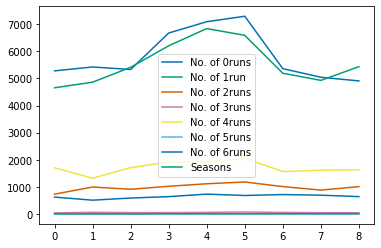

In [15]:
df_of_topruns.plot()

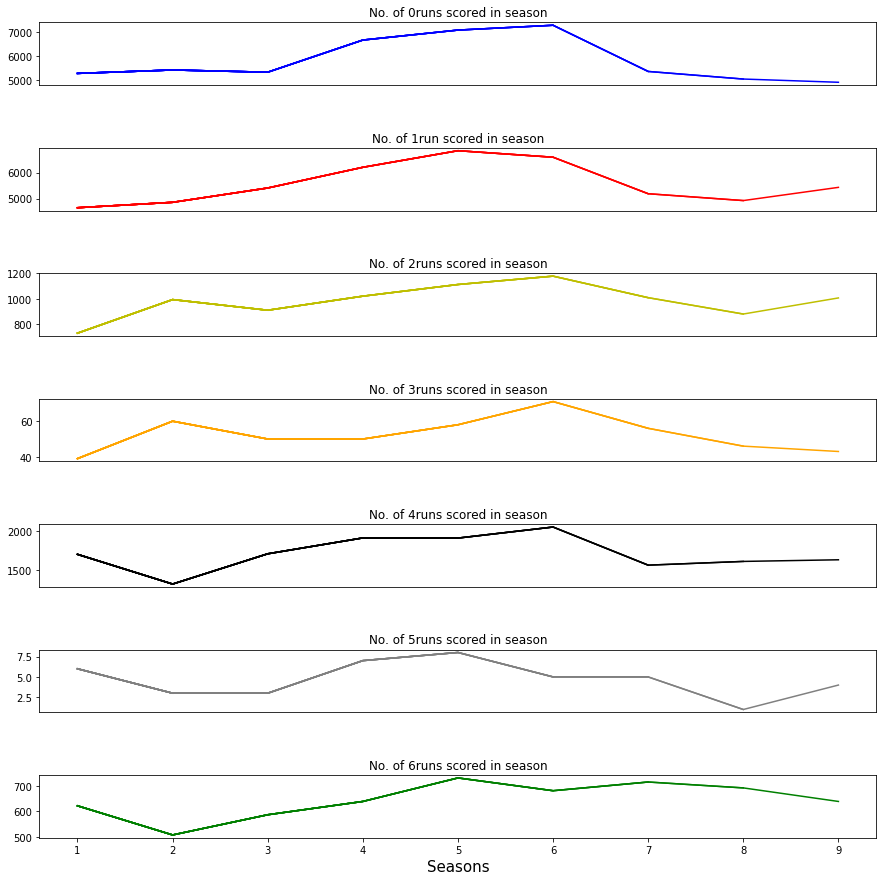

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

axs=[0,1,2,3,4,5,6]
fig, axs = plt.subplots(7,figsize=(15,15))
runslist = df_of_topruns.columns[0:-1].tolist()
seasonslist = [1,2,3,4,5,6,7,8,9]
colors = ['b','r','y','orange','k','grey','g']
fig.subplots_adjust(hspace=1.0)
#print(runslist)
#print(seasonslist)
#for i in seasonslist:
#    print(i)
def animate(i):
    for k, l in enumerate(runslist):
        #print('k - ',k)
        axs[k].plot(seasonslist[0:i+1], df_of_topruns.loc[0:i, l],c=colors[k],
                        label=l+' scored')
        axs[k].set_title(l+' scored in season')
        #axs[k].legend(loc='best')
        #axs[k].set_xticks([])
        if k == 6:
            axs[6].get_xaxis().set_visible(True)
        else:
            axs[k].get_xaxis().set_visible(False)
        #axs[k].get_xaxis().set_visible(False)
anim = FuncAnimation(fig, animate, frames=9, repeat=False) 

anim.save('subplots_runscored_in_seasons.gif', writer='pillow')
plt.xlabel('Seasons',fontsize=15)
plt.show()
plt.savefig('IPLruns.png')

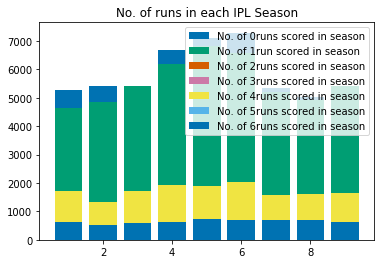

In [49]:
runslist = df_of_topruns.columns[0:-1].tolist()
seasonslist = [1,2,3,4,5,6,7,8,9]
for k, l in enumerate(runslist):
    plt.bar(seasonslist[0:i+1], df_of_topruns.loc[0:i, l],
                        label=l+' scored in season')
    plt.title('No. of runs in each IPL Season')
    plt.legend(loc='best')
plt.show()

In [20]:
means = df_of_topruns.mean(axis=1)
stds = df_of_topruns.std(axis=1)

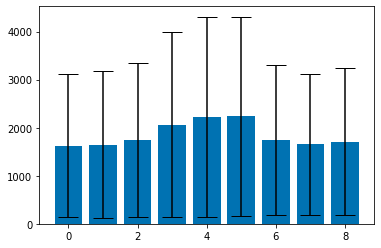

In [21]:
yerr = stds / np.sqrt(df_of_topruns.shape[1]) * stats.norm.ppf(0.975)
plt.bar(range(df_of_topruns.shape[0]),means,yerr=yerr,capsize=10)
conf_intrvls = [stats.norm.interval(0.95, loc=mu, scale=SE) for mu, SE in zip(means, stds/np.sqrt(df_of_topruns.shape[1]))]
fig = plt.gcf()

In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Colormap
cmap = colors.LinearSegmentedColormap.from_list("MyCmapName",["b", "white", "red"])
cpick = cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])

Provide a benchmark as in overall runs scored per season(including dot ball,singles,2 runs, 3 runs, boundaries, 5 runs and sixes): 1945


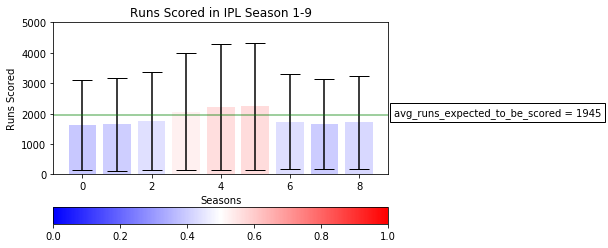

<Figure size 432x288 with 0 Axes>

In [24]:
conf_intrvls = [stats.norm.interval(0.95, loc=mu, scale=SE) for mu, SE in zip(means, stds/np.sqrt(df_of_topruns.shape[1]))]
def probability_over_y(y,confidence_interval):
    if y<np.min(confidence_interval):
        probability = 1.0
    elif y>np.max(confidence_interval):
        probability = 0.0
    else:
        probability = (np.max(confidence_interval)-y) / (np.max(confidence_interval) - np.min(confidence_interval))
    return probability
avg_runs_scored = int(input('Provide a benchmark as in overall runs scored per season(including dot ball,singles,2 runs, 3 runs, boundaries, 5 runs and sixes): '))
probabilities = [probability_over_y(avg_runs_scored,confidence_interval) for confidence_interval in conf_intrvls]
plt.bar(range(df_of_topruns.shape[0]), means, yerr=yerr, color=cpick.to_rgba(probabilities), capsize=10)
cbar = plt.colorbar(cpick, orientation="horizontal")
plt.axhline(y = avg_runs_scored, color = 'green', alpha = 0.5)
y_tick = plt.gca().get_yticks()
plt.title('Runs Scored in IPL Season 1-9')
plt.xlabel('Seasons')
plt.ylabel('Runs Scored')
#y_tick = np.append(y_tick, avg_runs_scored)
y_text = plt.text(9,avg_runs_scored, 'avg_runs_expected_to_be_scored = %d' %avg_runs_scored, bbox=dict(fc='white',ec='k'));
plt.gca().set_yticks(y_tick)
plt.show()
plt.savefig('IPL avg runs per season.png')

In [25]:
runs

,Unnamed: 0,No. of 0runs,No. of 1run,No. of 2runs,No. of 3runs,No. of 4runs,No. of 5runs,No. of 6runs,Seasons
0,0,5279,4654,729,39,1702,6,622,1
1,1,5422,4861,994,60,1320,3,508,2
2,2,5330,5410,910,50,1709,3,587,3
3,3,6675,6203,1021,50,1913,7,639,4
4,4,7092,6839,1113,58,1911,8,731,5
5,5,7294,6589,1179,71,2053,5,681,6
6,6,5361,5190,1009,56,1563,5,715,7
7,7,5043,4928,880,46,1611,1,692,8
8,8,4908,5434,1007,43,1632,4,639,9


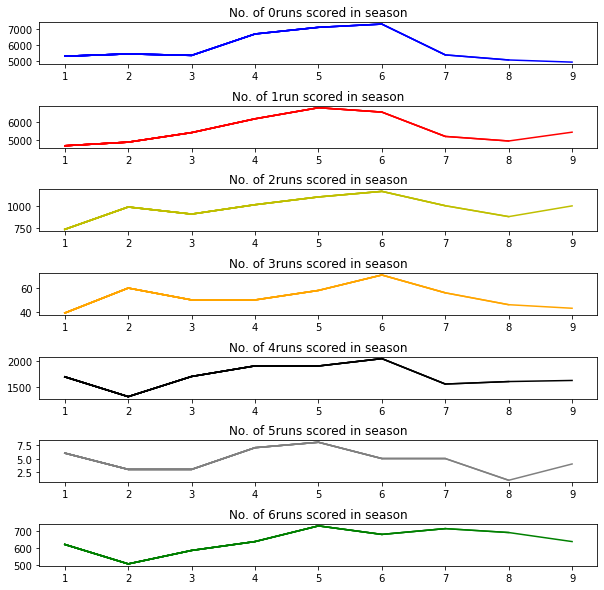

In [34]:
import pandas as pd
import numpy as np
import io

data = '''
 "No. of 0runs" "No. of 1run" "No. of 2runs" "No. of 3runs" "No. of 4runs" "No. of 5runs" "No. of 6runs" Seasons
0 5279 4654 729 39 1702 6 622 1
1 5422 4861 994 60 1320 3 508 2
2 5330 5410 910 50 1709 3 587 3
3 6675 6203 1021 50 1913 7 639 4
4 7092 6839 1113 58 1911 8 731 5
5 7294 6589 1179 71 2053 5 681 6
6 5361 5190 1009 56 1563 5 715 7
7 5043 4928 880 46 1611 1 692 8
8 4908 5434 1007 43 1632 4 639 9
'''

df = pd.read_csv(io.StringIO(data), sep='\s+')

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

axs=[0,1,2,3,4,5,6]
fig, axs = plt.subplots(7,figsize=(10,10))
labels = df.columns[:-1].tolist()
x = df['Seasons'].tolist()
colors = ['b','r','y','orange','k','grey','g']

# for i,l in enumerate(labels):
#     axs[i].plot(x, df[l],c=colors[i],label=l+' scored in season')
#     axs[i].set_title(l)
#     axs[i].legend(loc='best')

fig.subplots_adjust(hspace=1.0)

def animate(i):
    for k, l in enumerate(labels):
        axs[k].plot(x[0:i+1], df.loc[0:i, l], c=colors[k],
                    label=l+' scored in season')
        axs[k].set_title(l+' scored in season')
        #axs[k].legend(loc='best')

anim = FuncAnimation(fig, animate, frames=9, repeat=False) 

anim.save('subplots_ani.gif', writer='pillow')

plt.show()

